# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

 Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [94]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import linear_model

In [57]:
studentID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
#creating a DataFrame
student_data = pd.DataFrame({'StudentId': studentID, 'Age': age, 'Tardies': tardies})
student_data

,StudentId,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

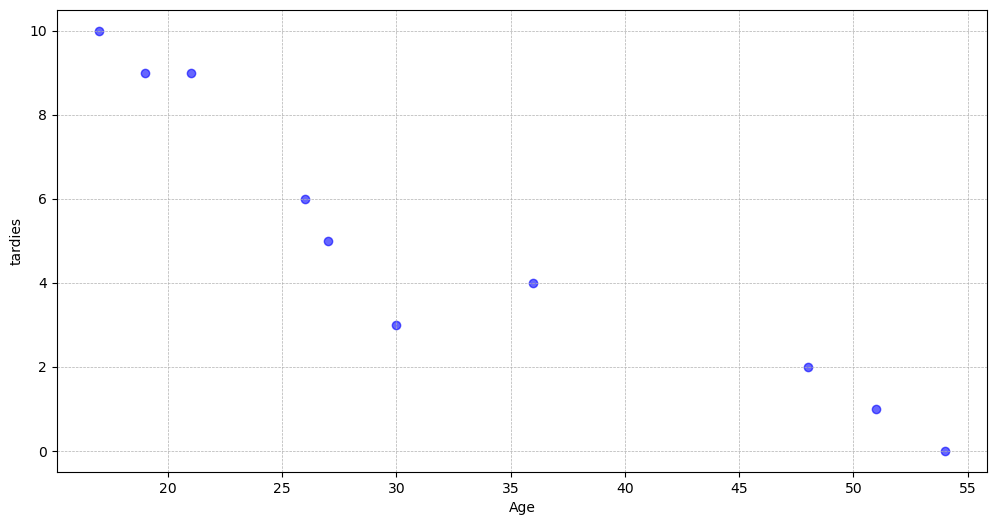

In [58]:
# Your code here.
plt.figure(figsize=(12,6))

plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('tardies')

plt.grid(True, which='both', linestyle='--', linewidth='0.5')
plt.show()



In [59]:
# Your code here.


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [60]:
# Your response here. 
Observation: The plot shows a trend where younger students tend to have more instances of being late compared to older students, this indicates a negative correlation between age and Tardies.
Hypothesis: Younger students might have lesser developed time management skills, less personal responsibility, or face more constraints that lead to tardiness. This could be due to dependence on guardians for transportation, less experience with scheduling, or higher engagement in extracurricular activities that conflict with class schedules.

SyntaxError: invalid syntax (1177551343.py, line 2)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [61]:
# Your response here.
#correlation:
correlation_matrix = student_data[['Age', 'Tardies']].corr()
age_times_late_corr = correlation_matrix.loc['Age', 'Tardies']


#covariance:
covariance_matrix = student_data[['Age', 'Tardies']].cov()
age_times_late_cov = covariance_matrix.loc['Age', 'Tardies']

#print
print(f"Covariance between Age and Times Late: {age_times_late_cov}")
print(f"Correlation between Age and Times Late: {age_times_late_corr}")

Covariance between Age and Times Late: -45.56666666666666
Correlation between Age and Times Late: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [62]:
# Your response here.
x = student_data[['Age']]
y = student_data['Tardies']
result = linear_model.LinearRegression().fit(x,y)
score = model.score(X, y)
print(f"Model R^2 Score: {score}")

Model R^2 Score: 0.8698192980111563


Plot your regression model on your scatter plot.

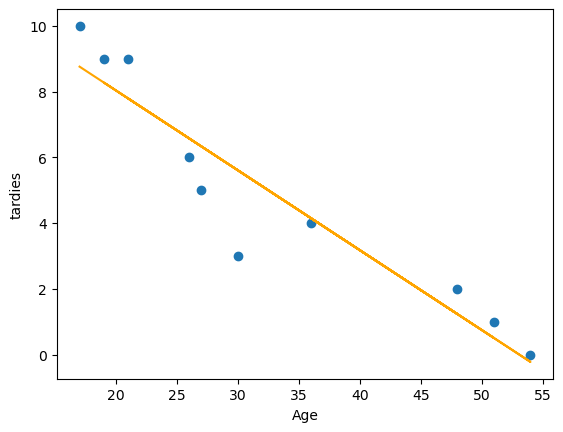

In [63]:
# Your code here.
regression_line = result.coef_[0]*x + result.intercept_
plt.plot(x, regression_line, c = 'orange')
plt.xlabel('Age')
plt.ylabel('tardies')
plt.scatter(x,y)
plt.show()



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [64]:
# Your response here. 
#The direction and magnitude of the Age coefficient give insight into the relationship between age and tardiness.

coefficient = model.coef_[0]
intercept = model.intercept_

# Print model parameters 
print(f"Coefficient for Age: {coefficient}")
print(f"Intercept: {intercept}")

Coefficient for Age: -0.266574585635359
Intercept: 13.464088397790054


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [66]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [67]:
#checking the basic info
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [68]:
#summary statics for numerical variable
print(vehicles.describe())

              Year  Engine Displacement     Cylinders  Fuel Barrels/Year  \
count  35952.00000         35952.000000  35952.000000       35952.000000   
mean    2000.71640             3.338493      5.765076          17.609056   
std       10.08529             1.359395      1.755268           4.467283   
min     1984.00000             0.600000      2.000000           0.060000   
25%     1991.00000             2.200000      4.000000          14.699423   
50%     2001.00000             3.000000      6.000000          17.347895   
75%     2010.00000             4.300000      6.000000          20.600625   
max     2017.00000             8.400000     16.000000          47.087143   

           City MPG   Highway MPG  Combined MPG  CO2 Emission Grams/Mile  \
count  35952.000000  35952.000000  35952.000000             35952.000000   
mean      17.646139     23.880646     19.929322               475.316339   
std        4.769349      5.890876      5.112409               119.060773   
min        

In [69]:
# checking for null value
print(vehicles.isnull().sum())

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'CO2 Emissions' is the target and you've selected some predictors
X = vehicles[['Year', 'Fuel Barrels/Year', 'Engine Displacement','Fuel Cost/Year']]  
y = vehicles['CO2 Emission Grams/Mile']

# Splitting dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Model MSE: {mse}")
print(f"Model R^2 Score: {r2}")


Model MSE: 319.2038505160713
Model R^2 Score: 0.9773718060484304


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [78]:
# Your response here. 
correlation_matrix = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 
                                  'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# Display correlations with 'CO2 Emission Grams/Mile'
correlations = correlation_matrix['CO2 Emission Grams/Mile'].sort_values()
print(correlations)

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


In [ ]:
Positive Correlation:Fuel Barrels/Year is positively correlated, indicating higher fuel consumption leads to higher CO2 emissions.
Negative Correlation:Combined MPG shows a negative correlation, where increasing miles per gallon efficiency corresponds to lower CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [79]:
# Your response here. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [80]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

In [81]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

In [82]:
# Calculate and print R^2 and MSE scores
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R^2 Score: 0.9773718060484304
Mean Squared Error: 319.2038505160713


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [84]:
# Your response here. 
import statsmodels.api as sm

# Add a constant to the predictor variable matrix to represent the intercept
X_with_const = sm.add_constant(X_train)

# Build and fit the model
model = sm.OLS(y_train, X_with_const).fit()

# Print the summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 3.473e+05
Date:                     Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                             19:05:53   Log-Likelihood:            -1.2224e+05
No. Observations:                    28761   AIC:                         2.445e+05
Df Residuals:                        28756   BIC:                         2.445e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [85]:
# Your code here.
data = { 
    'x': [1, 3, 4, 6, 8, 9, 11, 14],
    'y': [1, 2, 4, 4, 5, 7, 8, 13]
}
parties = pd.DataFrame(data)
print(parties)


    x   y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


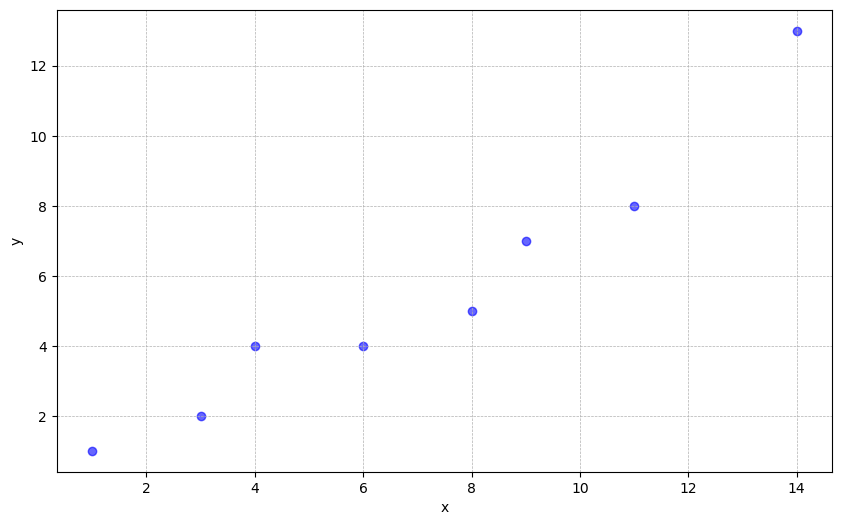

In [88]:
#the relationship between the two is linear
#plotting the relationship
plt.figure(figsize=(10,6))
plt.scatter(parties['x'], parties['y'], color='blue', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth='0.5')
plt.show()


In [90]:
#reshaping the data
x = parties['x'].values.reshape(-1,1)
y = parties['y'].values

#initialize and fit the model
model = LinearRegression().fit(x,y)

#determine r_Square score
r_squared = model.score(x,y)
print(f"r_Square score: {r_squared}")

r_Square score: 0.9316696375519905


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

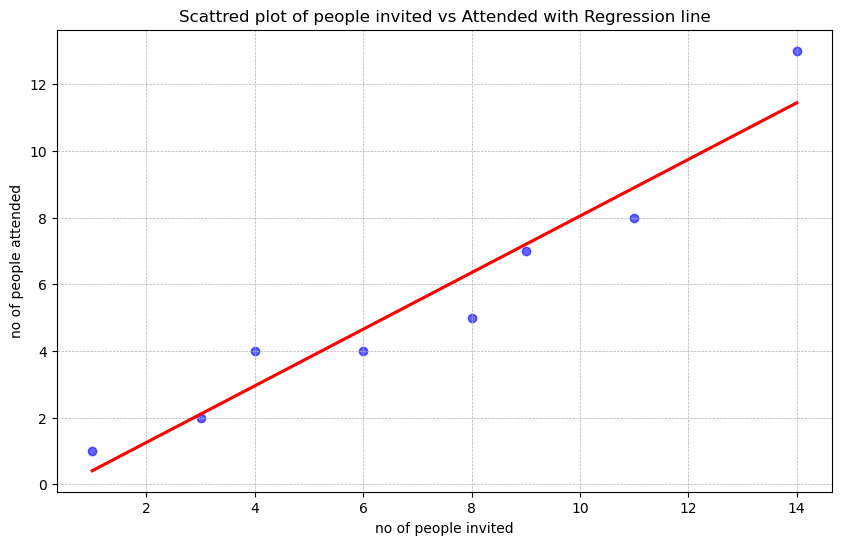

In [98]:
# Your code here.
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x='x', y='y', data=parties, ci=None, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})

plt.title('Scattred plot of people invited vs Attended with Regression line')
plt.xlabel('no of people invited')
plt.ylabel('no of people attended')
plt.grid(True, which='both', linestyle='--', linewidth='0.5')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
Scatter Plot: visually assess the relationship between the number of people invited (X) and the number of people who attended (Y). A positive trend in this plot would suggest a direct relationship, where inviting more people tends to result in more attendees.

Regression Line: The straight line plotted through the data points represents the best fit linear regression line. If this line slopes upwards as X increases, it supports a positive relationship; a steeper slope indicates stronger relationship strength.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [111]:
# Your response here. 
filter = parties[parties['y']/parties['x']>0.7]

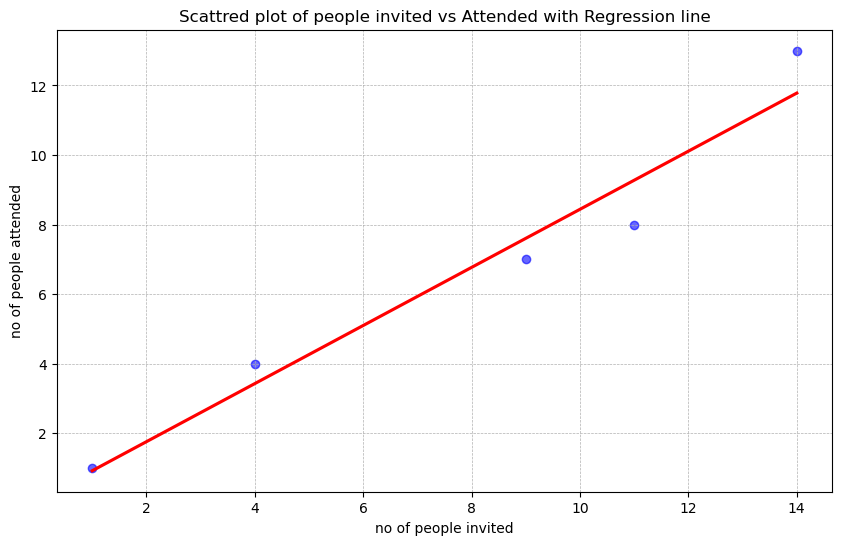

In [112]:
plt.figure(figsize=(10,6))
sns.regplot(x='x', y='y', data=filter, ci=None, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})

plt.title('Scattred plot of people invited vs Attended with Regression line')
plt.xlabel('no of people invited')
plt.ylabel('no of people attended')
plt.grid(True, which='both', linestyle='--', linewidth='0.5')
plt.show()

#This line filters the DataFrame to only include rows where the number of attendees (Y) is at least 70% of the number of people invited (X), effectively removing outliers under our hypothetical definition.

In [113]:
x = filter['x'].values.reshape(-1,1)
y = filter['y'].values

#initialize and fit the model
model = LinearRegression().fit(x,y)

#determine r_Square score
r_squared = model.score(x,y)
print(f"r_Square score: {r_squared}")

r_Square score: 0.953073038003948


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#the DataFrame  only include rows where the number of attendees (Y) is at least 70% of the number of people invited (X), effectively removing outliers under our hypothetical definition.